In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
PATH_TO_FILE = "./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107"

df = pd.read_csv(PATH_TO_FILE + ".csv")

filtered_col_names = []

for col_name in df.columns:
    if not "crude" in col_name.lower() and not "95ci" in col_name.lower():
        filtered_col_names.append(col_name)

filtered_df = df[filtered_col_names]

filtered_df.to_csv(PATH_TO_FILE + "_filtered.csv")

In [5]:
correlation_cols = []

exclude_cols = [
 'StateAbbr',
 'StateDesc',
 'CountyName',
 'CountyFIPS',
 'TotalPopulation',
 'Geolocation'
 ]
for col_name in filtered_col_names:
    if col_name not in exclude_cols:
        correlation_cols.append(col_name)

correlation_df = filtered_df[correlation_cols]


correlations = correlation_df.corr()
correlations["OBESITY_AdjPrev"].to_csv(PATH_TO_FILE + "_correlations.csv")

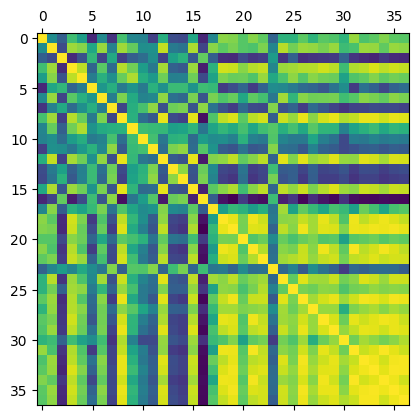

In [16]:
plt.matshow(correlations)
plt.show()

In [13]:
weighted_mean = filtered_df.groupby("StateDesc").apply(lambda x: (x["OBESITY_AdjPrev"] * x['TotalPopulation']).sum() / x['TotalPopulation'].sum()).reset_index(name='Weighted_Value')
weighted_mean

,StateDesc,Weighted_Value
0,Alabama,39.717476
1,Alaska,33.918264
2,Arizona,32.156073
3,Arkansas,38.243511
4,California,28.736732
5,Colorado,25.710640
6,Connecticut,29.918317
7,Delaware,35.928314
8,District of Columbia,24.500000
9,Florida,0.000000


In [20]:
# no values for Florida
filtered_df[filtered_df["StateAbbr"] == "FL"]["OBESITY_AdjPrev"]

351    NaN
356    NaN
376    NaN
377    NaN
381    NaN
        ..
2876   NaN
2883   NaN
2968   NaN
3059   NaN
3069   NaN
Name: OBESITY_AdjPrev, Length: 67, dtype: float64

/var/folders/2d/y_xyxzmd30xdgjk5kf8wqrxw0000gn/T/ipykernel_30004/189555758.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=weighted_mean_wo_fl['Weighted_Value'], shade=True)


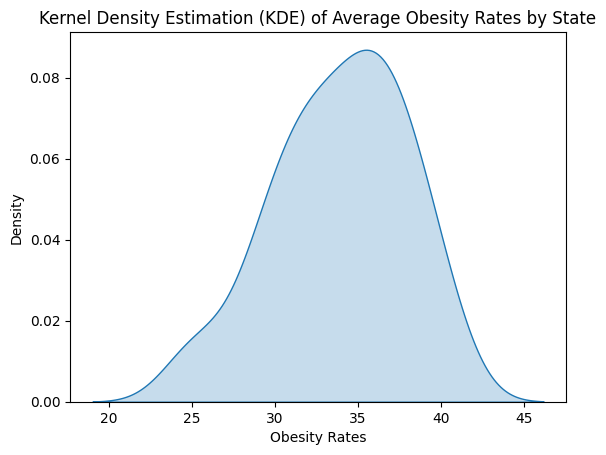

In [22]:
weighted_mean_wo_fl = weighted_mean[weighted_mean["StateDesc"] != "Florida"]
# Plot KDE using Seaborn
sns.kdeplot(data=weighted_mean_wo_fl['Weighted_Value'], shade=True)
plt.title('Kernel Density Estimation (KDE) of Average Obesity Rates by State')
plt.xlabel('Obesity Rates')
plt.ylabel('Density')
plt.show()